In [175]:
from IPython.display import display
import pandas as pd                 
import numpy as np  #for mathematical calculation
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt # for plotting graphs

In [176]:
#path for the training set
test = pd.read_csv("test.csv")
#path for the testing set
train = pd.read_csv("train.csv")

In [177]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [178]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [179]:
print(test.shape)
print(train.shape)

(367, 12)
(614, 13)


In [180]:
print(test.info())
print('\n')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  


### Dropando a coluna ID, não necessária, pois não queremos identificar indivíduos

In [181]:
test.drop('Loan_ID',axis=1,inplace=True)
train.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"test set (row, col): {test.shape}\n\ntrain set (row, col): {train.shape}")

test set (row, col): (367, 11)

train set (row, col): (614, 12)


### Missing values 

In [33]:
train.isnull().sum().sort_values(ascending=False) #em ordem descrescente

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

### Cada valor nulo será substituído pelo seu valor mais frequente, no caso de booleans tbm (moda).

In [38]:
# 1º Train Data
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{train[col].value_counts()}\n","-"*50)
    train[col] = train[col].fillna(
    train[col].dropna().mode().values[0] )   

train.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{train[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

In [39]:
# 2º Test Data
#filling the missing data

print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender']

for col in null_cols:
    print(f"{col}:\n{test[col].value_counts()}\n","-"*50)
    test[col] = test[col].fillna(
    test[col].dropna().mode().values[0] )   

    
test.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")

for col in null_cols:
    print(f"\n{col}:\n{test[col].value_counts()}\n","-"*50)

### Análise Exploratória

Before filling missing values

 ################################################## 

Credit_History:
1.0    279
0.0     59
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     307
Yes     37
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
150.0    12
125.0    11
110.0    10
120.0     9
90.0      9
         ..
159.0     1
155.0     1
257.0     1
112.0     1
234.0     1
Name: LoanAmount, Length: 144, dtype: int64
 --------------------------------------------------
Dependents:
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
12.0       1
36.0       1
120.0      1
60.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      286
Female 

### Análise Exploratória

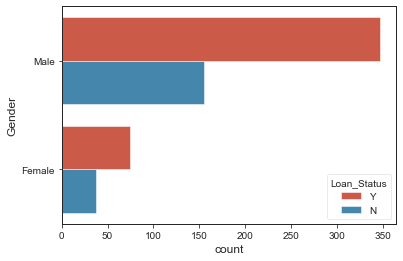

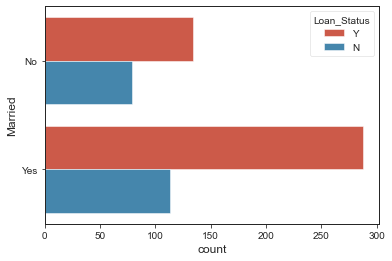

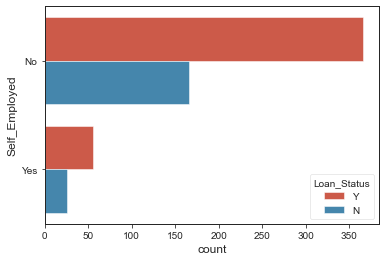

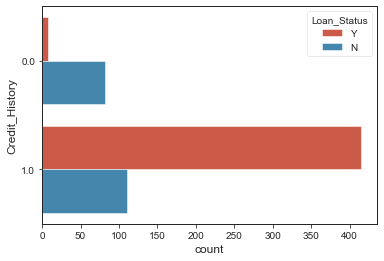

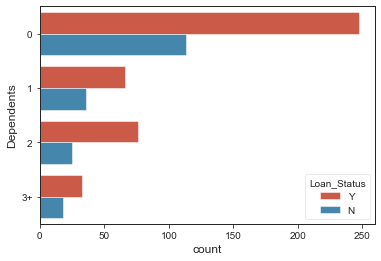

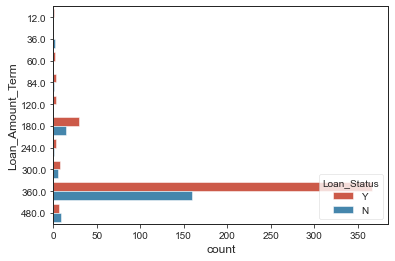

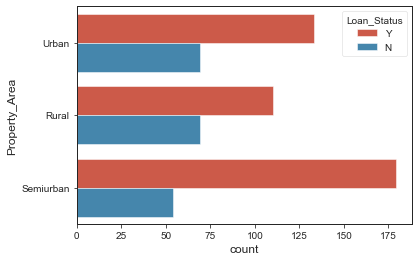

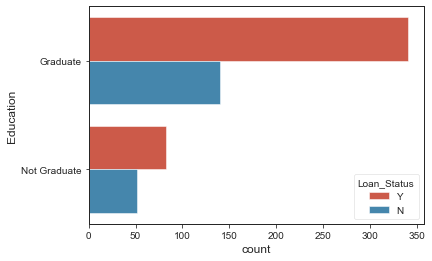

In [109]:
#ver como colocar tudo em um loop
sns.countplot(hue="Loan_Status", y="Gender", data=train)
plt.show()
sns.countplot(hue="Loan_Status", y="Married", data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Self_Employed', data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Credit_History', data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Dependents', data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Loan_Amount_Term', data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Property_Area', data=train)
plt.show()
sns.countplot(hue="Loan_Status", y='Education', data=train)
plt.show()

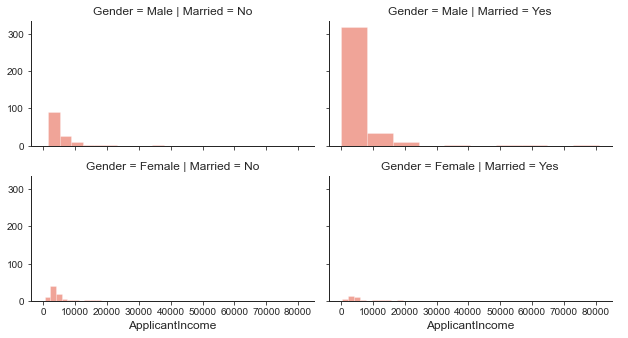

In [96]:
#Relações entre 2 variáveis preditivas: Gênero e Casamento, com o output ApplicantIncome
#Não achei muito bom visualmente
sns.set_style("ticks")
grid= sns.FacetGrid(train, row="Gender", col="Married",size=2.4, aspect=1.8)
grid.map(plt.hist, "ApplicantIncome", alpha=.5, bins=10)
grid.add_legend()

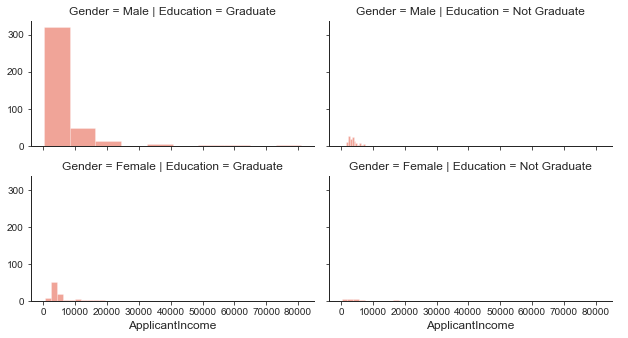

In [102]:
sns.set_style("ticks")
grid= sns.FacetGrid(train, row="Gender", col="Education",size=2.4, aspect=1.8)
grid.map(plt.hist, "ApplicantIncome", alpha=.5, bins=10)
grid.add_legend()

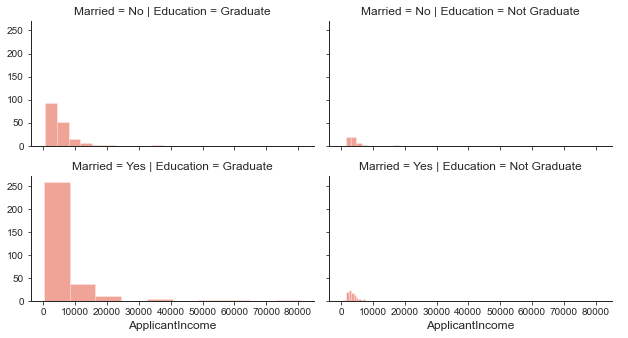

In [103]:
sns.set_style("ticks")
grid= sns.FacetGrid(train, row="Married", col="Education",size=2.4, aspect=1.8)
grid.map(plt.hist, "ApplicantIncome", alpha=.5, bins=10)
grid.add_legend()

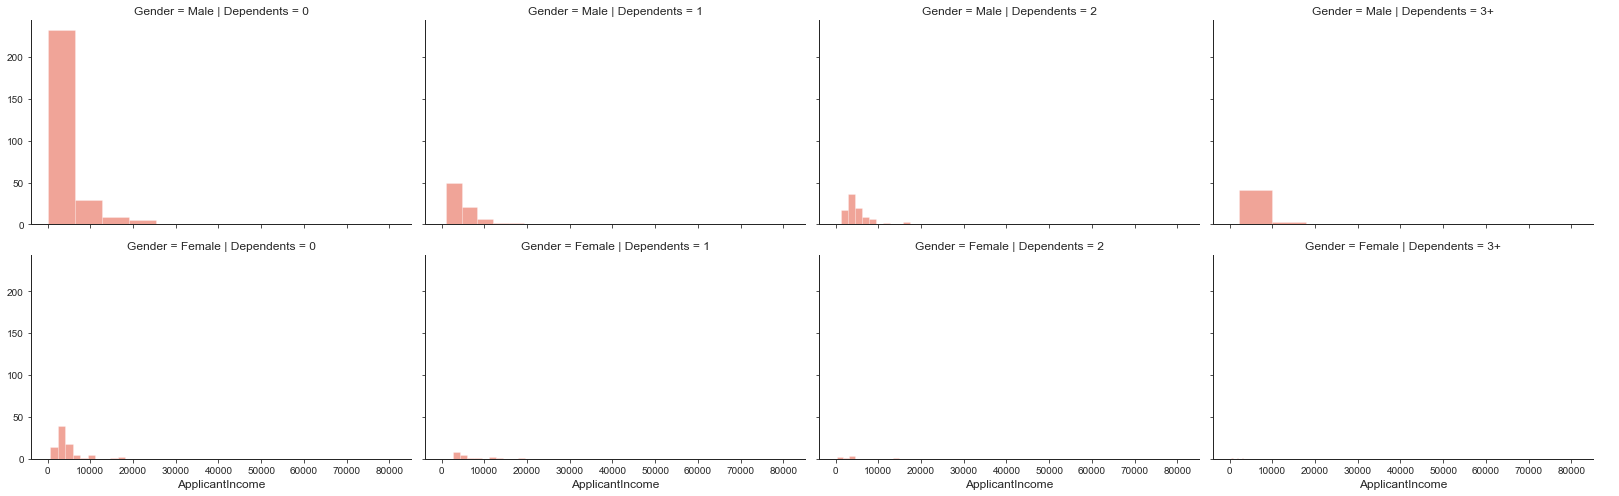

In [107]:
#Difícil ser homem
sns.set_style("ticks")
grid= sns.FacetGrid(train, row="Gender", col="Dependents",size=3.5, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha=.5, bins=10)
grid.add_legend()

### Codificação para dados numéricos; preparando para o treinamento

In [119]:
#transcrevo as categorias presentes nas variáveis
code_numeric = {'Male': 1, 'Female': 2,
                'Yes': 1, 'No': 2,
                'Graduate': 1, 'Not Graduate': 2,
                'Urban': 3, 'Semiurban': 2,'Rural': 1,
                'Y': 1, 'N': 0,
                '3+': 3}

In [122]:
train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [123]:
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,2,5720,0,110.0,360.0,1.0,3
1,1,1,1,1,2,3076,1500,126.0,360.0,1.0,3
2,1,1,2,1,2,5000,1800,208.0,360.0,1.0,3
3,1,1,2,1,2,2340,2546,100.0,360.0,1.0,3
4,1,2,0,2,2,3276,0,78.0,360.0,1.0,3
5,1,1,0,2,1,2165,3422,152.0,360.0,1.0,3
6,2,2,1,2,2,2226,0,59.0,360.0,1.0,2
7,1,1,2,2,2,3881,0,147.0,360.0,0.0,1
8,1,1,2,1,2,13633,0,280.0,240.0,1.0,3
9,1,2,0,2,2,2400,2400,123.0,360.0,1.0,2


In [124]:
test.info() #dependents precisa virar numérica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 31.7+ KB


#### Precisa converter a variável ‘Dependents’ em numérico usando pd.to_numeric

In [130]:
Dependents_ = pd.to_numeric(train.Dependents)
Dependents__ = pd.to_numeric(test.Dependents)

train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)

train = pd.concat([train, Dependents_], axis = 1)
test = pd.concat([test, Dependents__], axis = 1)

print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------ 

<AxesSubplot:>

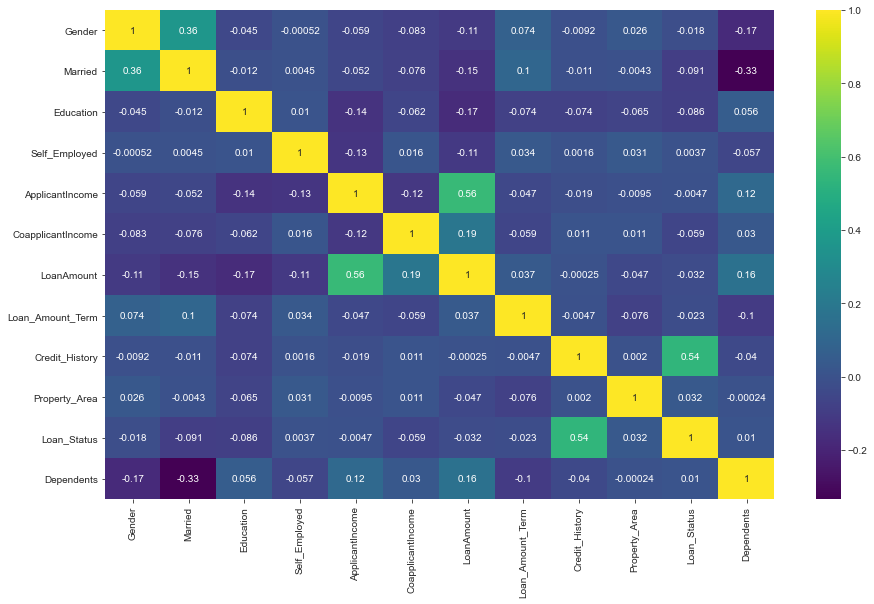

In [139]:
#Sem correlações muito fortes
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(), annot=True, cmap='viridis') #chamar função corr()

### Separando a variável output do conjunto das variáveis input

In [155]:
y = train['Loan_Status']
X = train.drop('Loan_Status', axis = 1)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Regressão Logística: 

Este é um algoritmo de classificação que usa uma função logística para prever o resultado binário (Verdadeiro / Falso, 0/1, Sim / Não) dada uma variável independente. O objetivo deste modelo é encontrar uma relação entre as características e a probabilidade de um resultado específico. A função logística utilizada é uma função logit que é um log de probabilidades a favor do evento. A função Logit desenvolve uma curva em forma de s com a estimativa de probabilidade semelhante a uma função escalonada

In [158]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [166]:
ypred_LR = model.predict(X_test)
print(ypred_LR)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [167]:
evaluation = f1_score(y_test, ypred_LR)
evaluation

0.8979591836734695

#### Árvore de Decisão:

Principalmente para problemas de *classificação*. Todos os recursos devem ser discretizados neste modelo, de modo que a população possa ser dividida em dois ou mais conjuntos ou subconjuntos homogêneos. Este modelo usa um algoritmo diferente para dividir um nó em dois ou mais subnós. Com a criação de mais subnós, a homogeneidade e a pureza dos nós aumentam em relação à variável dependente.

In [168]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [169]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 0 1 0 1 0 0]


In [171]:
evaluation = f1_score(y_test, ypred_tree)
evaluation

0.7515151515151515

#### Floresta Aleatória:

Este é um modelo de conjunto baseado em árvore que ajuda a melhorar a precisão do modelo. Ele combina um grande número de árvores de decisão para construir um modelo de previsão poderoso. É necessária uma amostra aleatória de linhas e recursos de cada árvore individual para preparar um modelo de árvore de decisão. A classe de previsão final é a moda de todos os preditores ou a média de todos os preditores.

In [164]:
forest = DecisionTreeClassifier()
forest.fit(X_train,y_train)

DecisionTreeClassifier()

In [172]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 1 0 0]


In [173]:
evaluation = f1_score(y_test, ypred_forest)
evaluation

0.7544910179640719

A partir da Análise Exploratória de Dados, podemos gerar insights 
a partir dos dados. Como cada um dos recursos se relaciona com o alvo.
Além disso, pode ser visto na avaliação dos três modelos que a Regressão Logística 
teve um desempenho melhor do que os outros, e a Floresta Aleatória se saiu melhor do que a Árvore de Decisão.